# Unsupervised Learning Tests

The following part is a machine learning testing hoping to further engage ideation. However here still the belief was flawed regarding the data structure.

There is a small explanation for each method used preceding it.

In [1]:
# Import necessary libraries and data (+handling)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv("first_edit.csv", index_col=0)
df = df[['RT', 'intarray', 'mzarray']]
print(df.dtypes)

def convert_string_to_floats(s):
    numbers = s.strip('[]').split()
    return [float(num) for num in numbers]

try:
    df["intarray"] = df["intarray"].apply(convert_string_to_floats)
    df["mzarray"] = df["mzarray"].apply(convert_string_to_floats)
except:
    print(df.dtypes)

print(df.head())
print(df.dtypes)

# Placeholder function for extracting features (define this function as needed)
def extract_features(row):
    # Example feature extraction
    return pd.Series({
        'RT_mean': np.mean(row['RT']),
        'intensity_sum': np.sum(row['intarray']),
        'mz_mean': np.mean(row['mzarray']),
    })

# Extract features for each spectrum
features_df = df.apply(extract_features, axis=1)

# features_df contains the extracted features for each spectrum
print(features_df.head())

RT          float64
intarray     object
mzarray      object
dtype: object
           RT                                           intarray  \
0  2982.78870  [48871.57, 93090.67, 119617.8, 105596.12, 5844...   
1  2983.20168  [59790.492, 110884.73, 140389.9, 125135.02, 77...   
2  2984.01666  [46852.145, 96281.12, 124956.57, 108827.82, 62...   
3  2985.14556  [54953.508, 96425.24, 116641.32, 97879.38, 541...   
4  2987.20332  [60526.164, 89810.484, 101158.25, 86533.97, 50...   

                                             mzarray  
0  [548.65954386, 548.66259121, 548.66563859, 548...  
1  [548.61379491, 548.61684187, 548.61988887, 548...  
2  [548.61382113, 548.6168681, 548.6199151, 548.6...  
3  [548.61384751, 548.61689448, 548.61994148, 548...  
4  [548.61079121, 548.61383815, 548.61688512, 548...  
RT          float64
intarray     object
mzarray      object
dtype: object
      RT_mean  intensity_sum     mz_mean
0  2982.78870     425620.793  548.665639
1  2983.20168     545302.004  5

In [2]:
# Function to plot 3D clusters
def plot_3d_clusters(df, clusters, title):
    df['cluster'] = clusters
    mzarray_flat = np.concatenate(df['mzarray'].values)
    rt_flat = np.repeat(df['RT'].values, [len(mz) for mz in df['mzarray']])
    intarray_flat = np.concatenate(df['intarray'].values)
    clusters_flat = np.repeat(df['cluster'].values, [len(mz) for mz in df['mzarray']])

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(mzarray_flat, rt_flat, intarray_flat, c=clusters_flat, cmap='viridis')

    ax.set_xlabel('m/z')
    ax.set_ylabel('RT')
    ax.set_zlabel('Intensity')
    ax.set_title(title)
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    plt.show()

## K MEANS CLUSTERING
#### Identify clusters of mass spectrometry data points that might represent different peaks.

- Detect Peaks: Identify groups of m/z values that represent distinct peaks?

- Analyze Cluster Properties: Cluster's properties (mean, standard deviation of m/z, intensity) can be analyzed. Understand peak characteristics?

- Split Overlapping Peaks: Assigning points to different clusters. Distinguish between overlapping peaks?

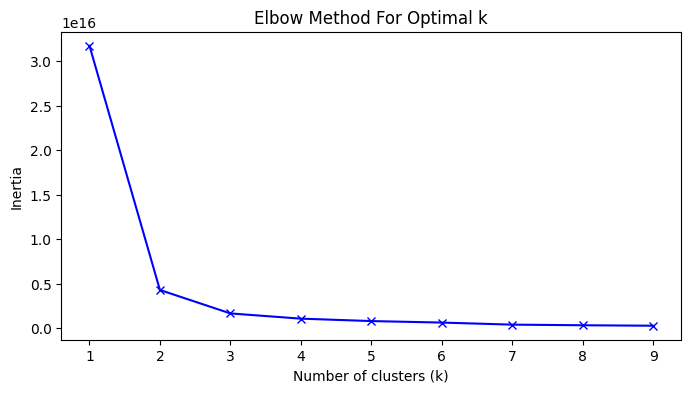

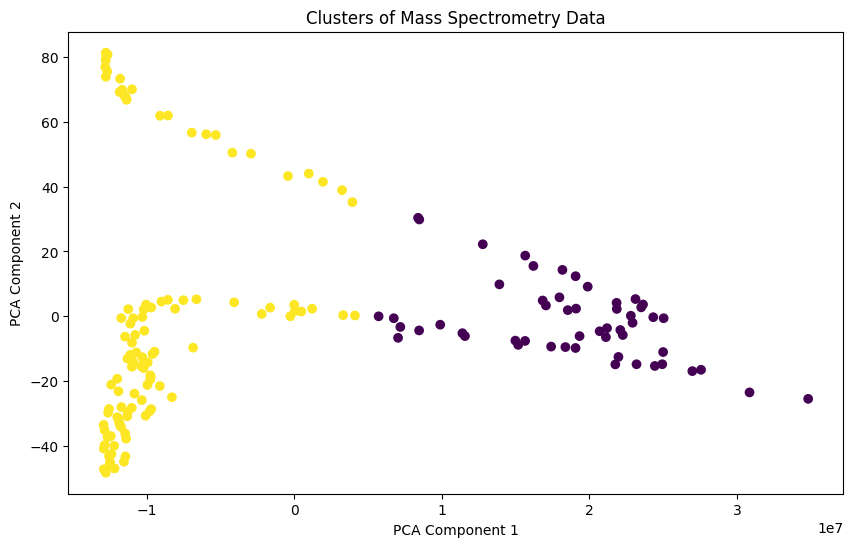

Cluster Centers:
 [[3.02298845e+03 3.18341968e+07 5.48624861e+02]
 [3.05843273e+03 4.04452193e+06 5.48619698e+02]]

Cluster 0 statistics:
           RT_mean  intensity_sum     mz_mean  cluster          pca1  \
count    53.000000   5.300000e+01   53.000000     53.0  5.300000e+01   
mean   3022.988451   3.183420e+07  548.624861      0.0  1.864152e+07   
std      10.613435   6.411723e+06    0.011426      0.0  6.411723e+06   
min    3004.975680   1.891060e+07  548.587237      0.0  5.717926e+06   
25%    3013.993860   2.837009e+07  548.623571      0.0  1.517741e+07   
50%    3023.266620   3.228990e+07  548.627523      0.0  1.909723e+07   
75%    3031.308120   3.611988e+07  548.632646      0.0  2.292720e+07   
max    3043.872240   4.801956e+07  548.633910      0.0  3.482688e+07   

            pca2  
count  53.000000  
mean   -1.568115  
std    11.751501  
min   -25.510976  
25%    -8.848112  
50%    -3.310772  
75%     3.623347  
max    30.377994  

Cluster 1 statistics:
           RT_mean 

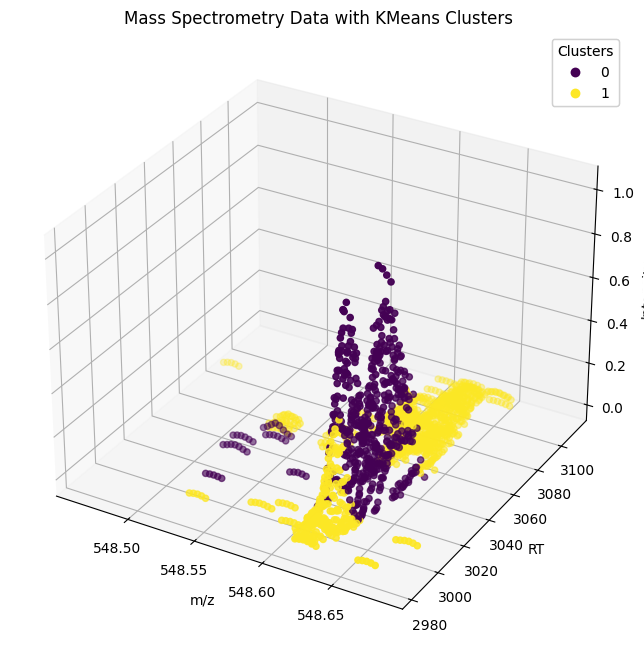

In [3]:
# K-Means Clustering
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_df)
features_df['cluster'] = clusters

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_df.drop(columns=['cluster']))
features_df['pca1'] = principal_components[:, 0]
features_df['pca2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(features_df['pca1'], features_df['pca2'], c=features_df['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Mass Spectrometry Data')
plt.show()

cluster_centers = kmeans.cluster_centers_
print('Cluster Centers:\n', cluster_centers)
for cluster in range(kmeans.n_clusters):
    cluster_data = features_df[features_df['cluster'] == cluster]
    print(f'\nCluster {cluster} statistics:')
    print(cluster_data.describe())

plot_3d_clusters(df, clusters, title="Mass Spectrometry Data with KMeans Clusters")

# DBSCAN

Purpose:
Identify dense regions in data which correspond to peaks, and to detect noise.

- Detect Peaks and Noise: Differentiate between dense clusters (peaks) and sparse points (noise or background).
- Handle Arbitrary Shapes: Detecting peaks that have irregular shapes.
- Identify Outliers: Find potential anomalies or errors in data..

eps=0.1, min_samples=5
Cluster counts: {-1: 161}
eps=0.1, min_samples=10
Cluster counts: {-1: 161}
eps=0.1, min_samples=15
Cluster counts: {-1: 161}
eps=0.5, min_samples=5
Cluster counts: {-1: 27, 0: 23, 1: 45, 2: 6, 3: 60}


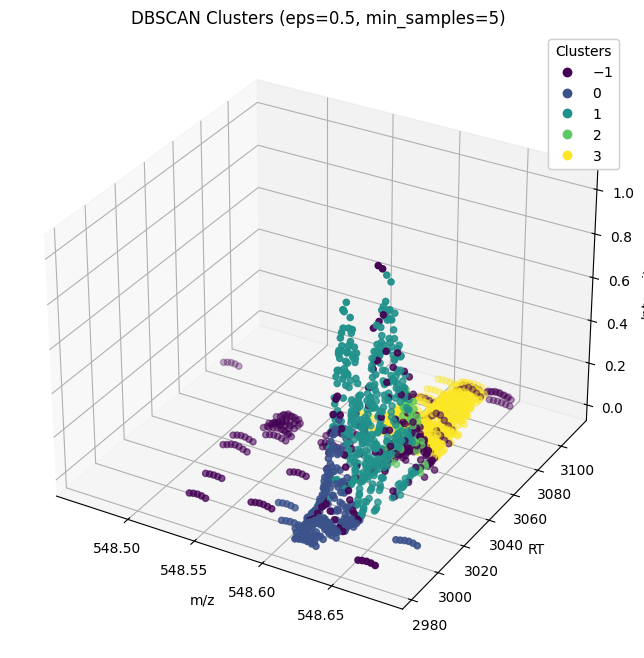

eps=0.5, min_samples=10
Cluster counts: {-1: 60, 0: 13, 1: 36, 2: 52}


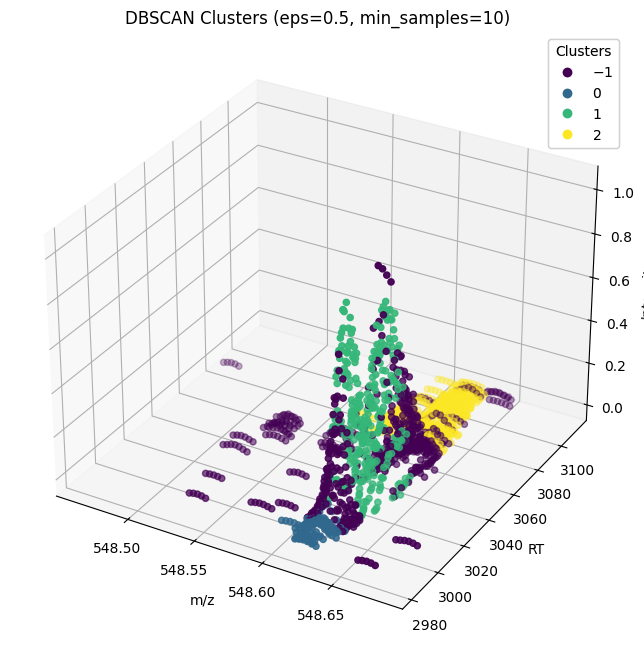

eps=0.5, min_samples=15
Cluster counts: {-1: 80, 0: 30, 1: 51}


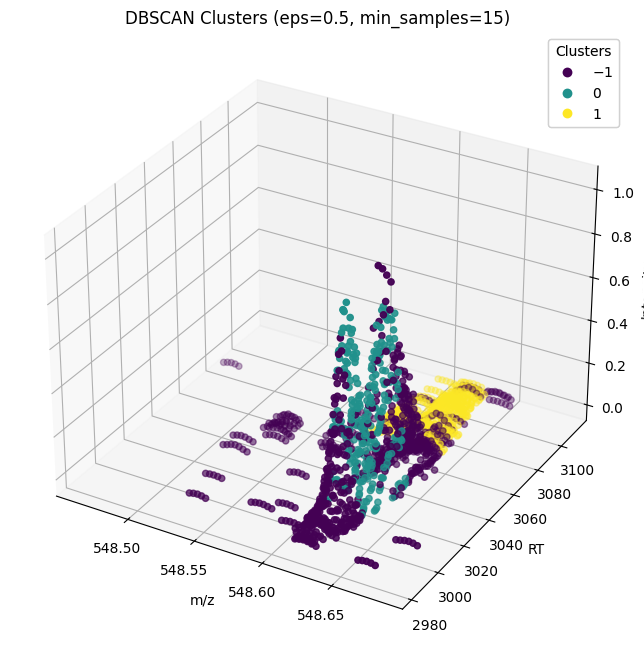

eps=1.0, min_samples=5
Cluster counts: {-1: 8, 0: 24, 1: 48, 2: 6, 3: 75}


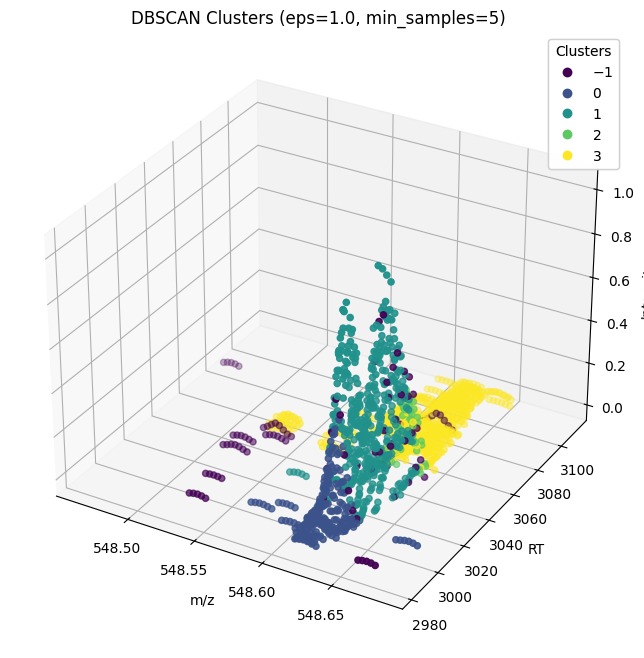

eps=1.0, min_samples=10
Cluster counts: {-1: 18, 0: 24, 1: 48, 2: 71}


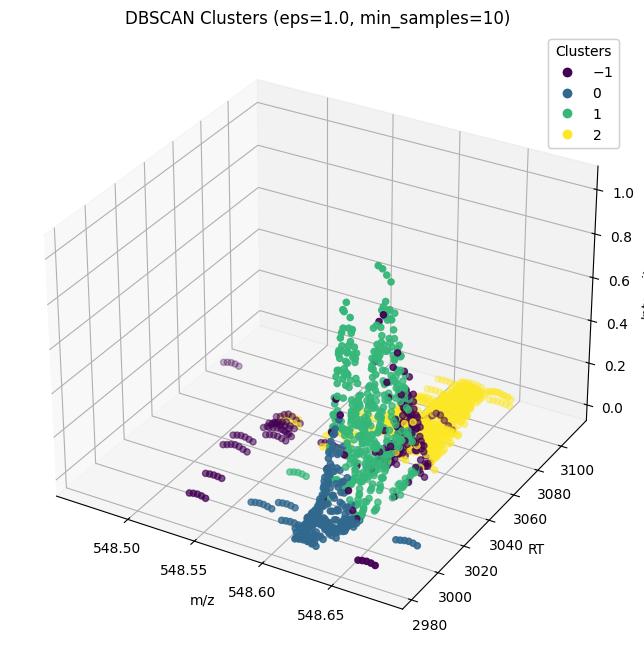

eps=1.0, min_samples=15
Cluster counts: {-1: 21, 0: 22, 1: 48, 2: 70}


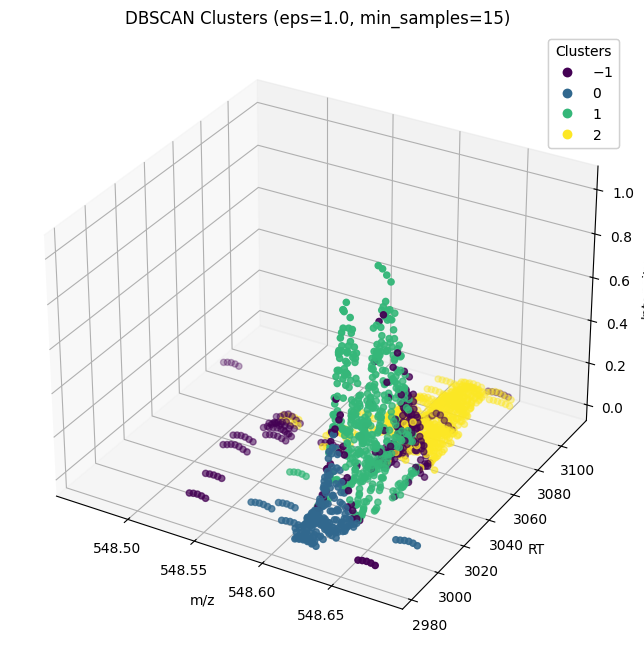

eps=2.0, min_samples=5
Cluster counts: {-1: 3, 0: 105, 1: 53}


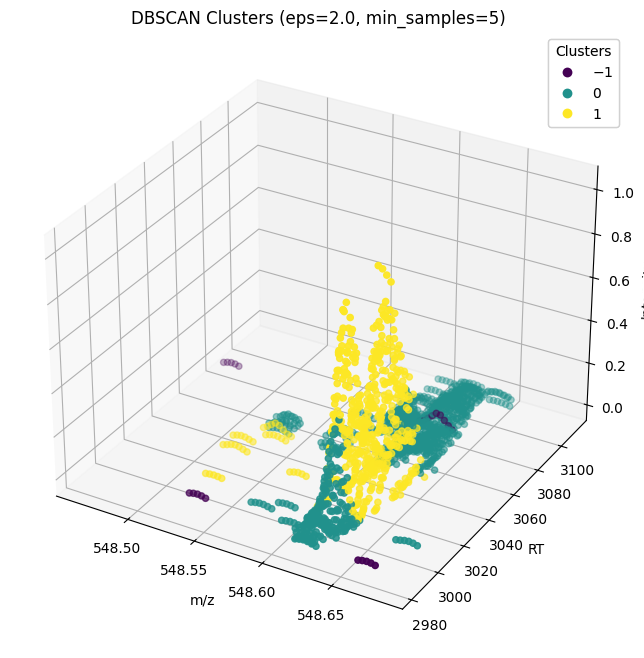

eps=2.0, min_samples=10
Cluster counts: {-1: 5, 0: 105, 1: 51}


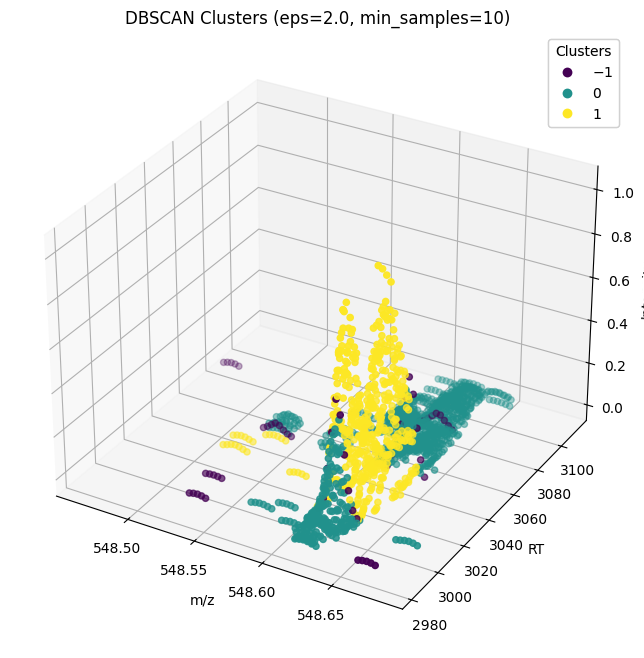

eps=2.0, min_samples=15
Cluster counts: {-1: 5, 0: 105, 1: 51}


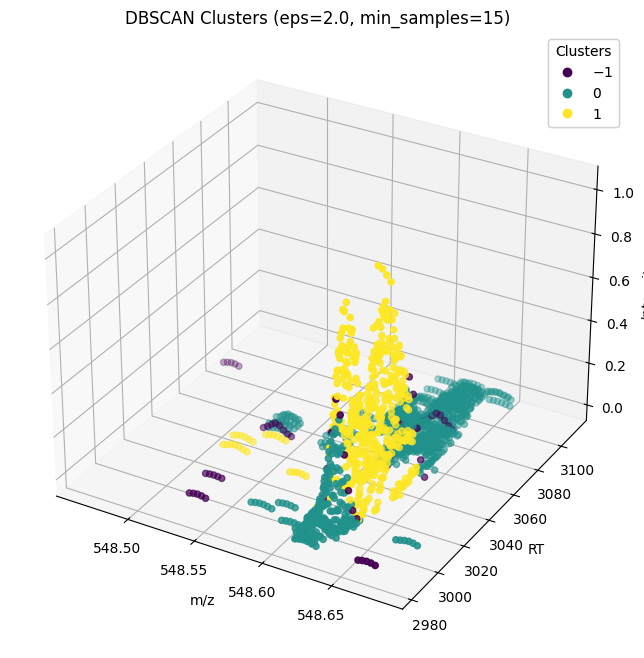

In [4]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

eps_values = [0.1, 0.5, 1.0, 2.0]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_clusters = dbscan.fit_predict(features_scaled)
        features_df['dbscan_cluster'] = dbscan_clusters
        
        unique, counts = np.unique(dbscan_clusters, return_counts=True)
        cluster_counts = dict(zip(unique, counts))
        print(f'eps={eps}, min_samples={min_samples}')
        print('Cluster counts:', cluster_counts)

        if len(cluster_counts) >= 2:
            plot_3d_clusters(df, dbscan_clusters, title=f'DBSCAN Clusters (eps={eps}, min_samples={min_samples})')


## PCA
Purpose:
PCA reduces the dimensionality of data by transforming it to a new set of orthogonal components ordered by the amount of variance they capture.

Applications:
- Dimensionality Reduction: Reduces the number of features while retaining the most important information.
- Data Visualization: Visualizes high-dimensional data in 2D or 3D for exploratory analysis.
- Noise Reduction: Identifies and removes noise by focusing on components with the highest variance.

C:\Users\victo\AppData\Local\Temp\ipykernel_15052\1019414101.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(features_df['pca1'], features_df['pca2'], c='blue', cmap='viridis', alpha=0.5)


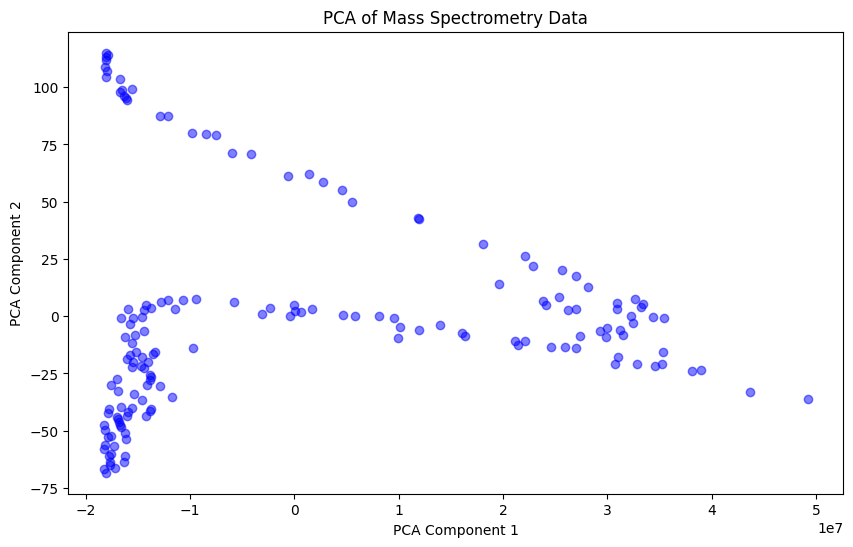

In [5]:
# Import necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_df)
features_df['pca1'] = principal_components[:, 0]
features_df['pca2'] = principal_components[:, 1]

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(features_df['pca1'], features_df['pca2'], c='blue', cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Mass Spectrometry Data')
plt.show()


## Agglomerative Clustering
Purpose:

To build a hierarchy of peaks and understand their nested structure.

- Hierarchical Relationships: Useful for visualizing the hierarchical relationship between peaks.
- Dendrogram Analysis: A dendrogram can help decide on the number of clusters (peaks) by showing the hierarchy of data points.

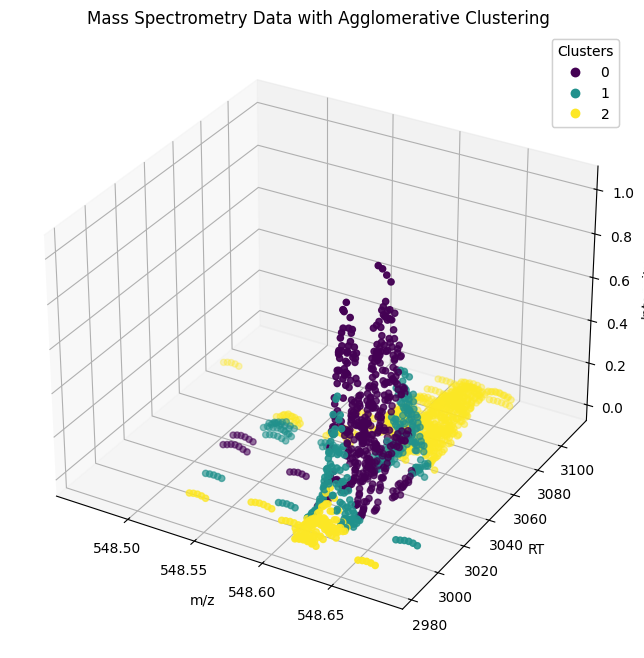

In [6]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_clusters = agglo.fit_predict(features_df)

# Plot the clusters using the custom function
plot_3d_clusters(df, agglo_clusters, title='Mass Spectrometry Data with Agglomerative Clustering')


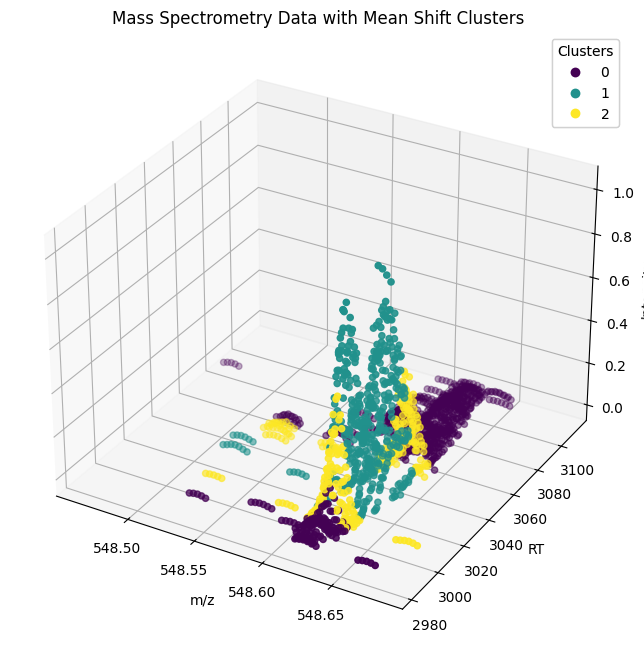

In [7]:
# Import necessary libraries
from sklearn.cluster import MeanShift

# Perform Mean Shift clustering
meanshift = MeanShift()
meanshift_clusters = meanshift.fit_predict(features_df)

# Plot the clusters using the custom function
plot_3d_clusters(df, meanshift_clusters, title="Mass Spectrometry Data with Mean Shift Clusters")


## Mean Shift Clustering
Purpose:

To model the data as a mixture of Gaussian distributions, where each Gaussian corresponds to a peak.

- Soft Clustering: Provides probabilities of each point belonging to each peak.
- Peak Characterization: Helps in characterizing peaks based on Gaussian distributions, useful for overlapping peaks.
- Density Estimation: Useful for estimating the density of peaks and identifying main peaks and sub-peaks.

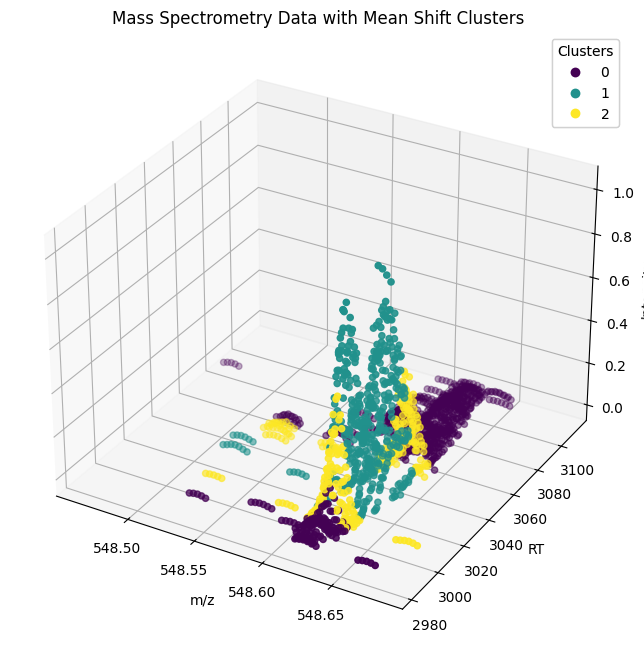

In [8]:
from sklearn.cluster import MeanShift

# Perform Mean Shift clustering
meanshift = MeanShift()
meanshift_clusters = meanshift.fit_predict(features_df)

# Plot the clusters using the custom function
plot_3d_clusters(df, meanshift_clusters, title="Mass Spectrometry Data with Mean Shift Clusters")


## t-SNE
Purpose:

To visualize high-dimensional mass spectrometry data in a lower-dimensional space, preserving local structure.

- Detailed Visualization: Provides a detailed visualization of the data structure, helping to identify and differentiate between peaks.
- Exploratory Data Analysis: Useful for exploring the relationships between different peaks.

     perplexity=5, learning_rate=10  perplexity=5, learning_rate=200  \
0                        -31.469322                       -43.470074   
1                         17.755682                       -28.162722   
2                        -31.634163                       -31.793943   
3                         -1.446047                       -22.043018   
4                        -32.280067                       -42.144089   
..                              ...                              ...   
317                      -13.535069                       -16.895020   
318                      -31.068249                       -48.496601   
319                       24.003839                       -32.768414   
320                      -32.129093                       -42.525951   
321                       17.670881                       -29.421946   

     perplexity=5, learning_rate=500  perplexity=30, learning_rate=10  \
0                        -222.263351                       -13

C:\Users\victo\AppData\Local\Temp\ipykernel_15052\3334242004.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='viridis')


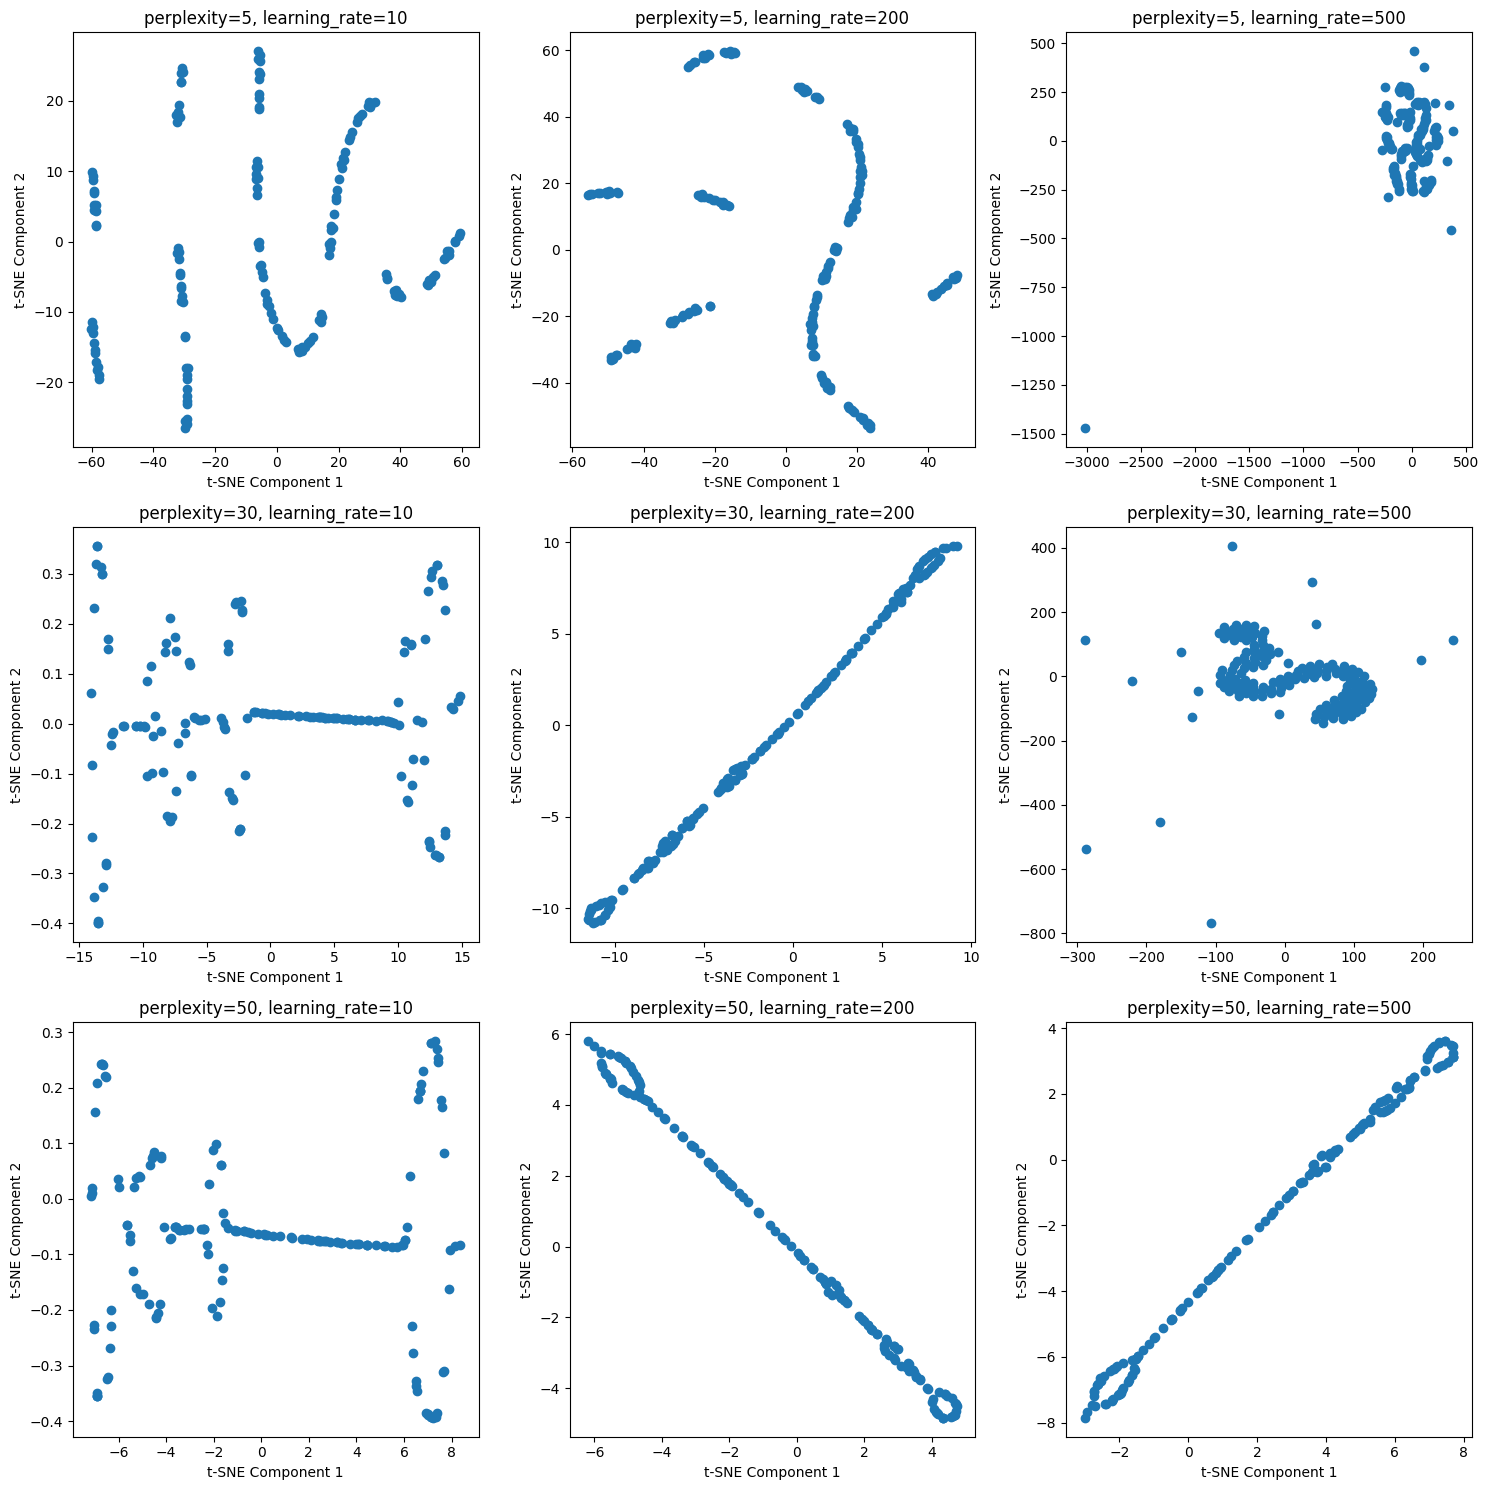

In [9]:
# Import necessary libraries
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define ranges for perplexity and learning_rate
perplexity_values = [5, 30, 50]
learning_rate_values = [10, 200, 500]

# Dictionary to store the results
results = {}

# Iterate over the combinations of perplexity and learning_rate
for perplexity in perplexity_values:
    for learning_rate in learning_rate_values:
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
        tsne_results = tsne.fit_transform(features_df)
        
        # Store the results in the dictionary
        results[f"perplexity={perplexity}, learning_rate={learning_rate}"] = tsne_results

# Convert the results dictionary to a structured format
results_df = pd.DataFrame({
    key: value.flatten() for key, value in results.items()
})

# Print the results DataFrame
print(results_df)

# Plot the t-SNE results for each parameter combination
fig, axes = plt.subplots(len(perplexity_values), len(learning_rate_values), figsize=(15, 15))

for i, perplexity in enumerate(perplexity_values):
    for j, learning_rate in enumerate(learning_rate_values):
        key = f"perplexity={perplexity}, learning_rate={learning_rate}"
        tsne_results = results[key]
        
        ax = axes[i, j]
        ax.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='viridis')
        ax.set_title(key)
        ax.set_xlabel('t-SNE Component 1')
        ax.set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()
